# Increasing the telecom company profit

**Project's task is to analyze customer behavior to find out which tariff is the most profitable, and also whether the location of customers affects their costs.**

## Results of the EDA

An exploratory analysis of the data showed that the distributions of call durations and used megabytes for Smart clients are close to normal, their median average monthly values ​​are approximately 450 minutes and 17,000 megabytes, respectively. The distribution with call duration also has a slight negative skewness. The distributions of call durations and used megabytes are different for Ultra clients - they have larger standard deviations, as well as larger ranges than the previous two distributions. The median monthly averages are also larger and are approximately 550 minutes and 19,000 megabytes, respectively. Both distributions of Ultra users are positively skewed. The distributions of messages for clients of the two tariffs are similar and close to Poisson, however, here we also observe that the values ​​of Smart clients have a smaller standard deviation and a smaller range of values. The median average monthly values ​​of the number of messages for Smart users (30) are significantly less than the same indicator for Ultra users (50). In addition, there are many more outliers in Smart user values.

## Results of the hypotesis testing

Testing the first hypothesis gave the following results. The median average monthly revenues per user are 1204 and 1950, respectively, but the sample of Smart's customers is much higher (which most likely reflects the general population - more people will buy a tariff cheaper). As a rule, Smart users, unlike Ultra users, do not have enough packages of minutes, messages and the Internet, which forces them to overpay more than 2 times on average. In addition, a significant portion of Smart users pay the same amount on average as Ultra users, despite the difference in subscription fees. As for the second hypothesis: the average revenue from users from Moscow is equal to the average revenue from users from other regions. The average monthly income from users from other regions is larger, but this may be due to the fact that there are significantly more such users in the sample than users from Moscow.

## Business results

The Smart tariff brings more money to the company than the Ultra tariff. Despite the fact that the subscription fee for Ultra is higher, the company receives more money from Smart customers every month, since
- There are much more Smart customers - more people will buy a cheaper tariff,
- Smart users, unlike Ultra users, do not have enough packages of minutes, messages and the Internet, which forces them to overpay more than 2 times on average.

## Data understanding

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
from scipy.stats import norm
import math as mt
from functools import reduce

In [2]:
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

In [3]:
users.name = 'users'
calls.name = 'calls'
messages.name = 'messages'
internet.name = 'internet'
tariffs.name = 'tariffs'

In [4]:
for df in [users, calls, messages, internet, tariffs]:
    print(df.name)
    df.info()
    display(df.head(10))
    print()

users
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart



calls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000



messages
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000



internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000



tariffs
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [5]:
internet.drop('Unnamed: 0', axis=1, inplace=True)

## Preprocessing

In [6]:
users['churn_date'] = users['churn_date'].fillna('2018-12-31')

In [7]:
def datetime_convert(df, column):
    '''Меняет формат на datetime'''
    df[column] = pd.to_datetime(df[column], format='%Y-%m-%d')

In [8]:
datetime_convert(messages, 'message_date')
datetime_convert(calls, 'call_date')
datetime_convert(internet, 'session_date')

for column in ['churn_date', 'reg_date']:
    datetime_convert(users, column)

In [9]:
for df in [users, calls, messages, internet]:
    df['user_id'] = df['user_id'].astype('object')

In [10]:
def tariff_func(value):
    '''Переписывает имена тарифов'''
    if value == 'smart':
        return 0
    return 1

In [11]:
tariffs['tariff_name'] = tariffs['tariff_name'].apply(tariff_func)
users['tariff'] = users['tariff'].apply(tariff_func)

In [12]:
for df in [calls, internet]:
    print(df.name)
    display(df.describe()) 
    print()

calls


,duration
count,202607.000000
mean,6.755887
std,5.843365
min,0.000000
25%,1.300000
50%,6.000000
75%,10.700000
max,38.000000



internet


,mb_used
count,149396.000000
mean,370.192426
std,278.300951
min,0.000000
25%,138.187500
50%,348.015000
75%,559.552500
max,1724.830000


In [13]:
def ceil_func(value):
    '''Округляет значение вверх'''
    return mt.ceil(value)

In [14]:
calls['duration'] = calls['duration'].apply(ceil_func)

In [15]:
[df.duplicated().sum() for df in (calls, messages, internet, users)]

[0, 0, 0, 0]

In [16]:
def month_func(df, column):
    '''Выносит месяц даты в отдельный столбец'''
    df['month'] = df[column].dt.month

In [17]:
month_func(messages, 'message_date')
month_func(calls, 'call_date')
month_func(internet, 'session_date')

## EDA

1. Calculation of the number and total duration of calls by month for each user.

In [18]:
calls.pivot_table(index='user_id', columns='month', values='duration', aggfunc='count').fillna('')

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,,,,,22,43,47,52,58,57,43,46
1001,,,,,,,,,,,59,63
1002,,,,,,15,26,42,36,33,32,33
1003,,,,,,,,55,134,108,115,108
1004,,,,,9,31,22,19,26,29,19,21
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,,,,,,,,17,112,152,129,155
1496,7,77,79,67,63,74,73,88,68,72,80,80
1497,,,,,,,,,,66,64,71


In [19]:
calls.pivot_table(index='user_id', columns='month', values='duration', aggfunc='sum').fillna('')

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,,,,,159,172,340,408,466,350,338,333
1001,,,,,,,,,,,430,414
1002,,,,,,117,214,289,206,212,243,236
1003,,,,,,,,380,961,855,824,802
1004,,,,,35,171,135,137,117,145,117,130
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,,,,,,,,92,813,1030,954,1031
1496,48,594,557,521,484,555,582,527,486,450,662,518
1497,,,,,,,,,,490,371,545


2. Calculation of the number of sent messages by month for each user.

In [20]:
messages.pivot_table(index='user_id', columns='month', values='id', aggfunc='count').fillna('')

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,,,,,22,60,75,81,57,73,58,70
1002,,,,,,4,11,13,4,10,16,12
1003,,,,,,,,37,91,83,94,75
1004,,,,,95,134,181,151,146,165,158,162
1005,7,38,56,41,42,47,56,64,52,44,51,54
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,,,,,,,,13,82,82,79,84
1496,9,45,46,49,40,35,42,41,29,35,46,51
1497,,,,,,,,,,20,14,17


3. Calculation of the volume of Internet traffic used by months for each user.

In [21]:
internet.pivot_table(index='user_id', columns='month', values='mb_used', aggfunc='sum').fillna('')

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,,,,,2253.49,23233.8,14003.6,14055.9,14568.9,14702.5,14756.5,9817.61
1001,,,,,,,,,,,18429.3,14036.7
1002,,,,,,10856.8,17580.1,20319.3,16691.1,13888.3,18587.3,18113.7
1003,,,,,,,,8565.21,12468.9,14768.1,11356.9,10121.5
1004,,,,,13404,17600,22229.6,28584.4,15109,18475.4,15616,18021
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,,,,,,,,2614.07,33067.6,29363,38939.1,23426.8
1496,3762.73,28489.7,24959,21074.7,23709.8,20134.3,24364.8,23530,26934.7,28183.2,25063.4,20736.2
1497,,,,,,,,,,11500.3,14156.1,19918.6


### Calculation of monthly revenue per user

In [22]:
calls_grouped = calls.groupby(['user_id', 'month']).agg(total_duration_calls=('duration', 'sum'))

In [23]:
messages_grouped = messages.groupby(['user_id', 'month']).agg(number_messages=('message_date', 'count'))

In [24]:
internet_grouped = internet.groupby(['user_id', 'month']).agg(total_traffic_volume=('mb_used', 'sum'))

In [25]:
data_grouped = reduce(lambda left, right: pd.merge(left, right, on=['user_id', 'month'], how='outer'), [calls_grouped, messages_grouped, internet_grouped])

In [26]:
for column in ['total_duration_calls', 'number_messages', 'total_traffic_volume']:
    data_grouped.loc[data_grouped[column].isna(), column] = 0

In [27]:
for user in data_grouped.index:
    data_grouped.loc[user, 'city'] = users.loc[user[0]-1000, 'city']

In [28]:
for user in data_grouped.index:
    data_grouped.loc[user, 'tariff'] = users.loc[user[0]-1000, 'tariff']

In [29]:
for column in ['total_duration_calls', 'number_messages', 'total_traffic_volume', 'tariff']:
    data_grouped[column] = data_grouped[column].astype('int') 

In [30]:
def profit(row):
    '''Считает месячную прибыль с каждого пользователя'''
    tariff = row['tariff']
    calls = row['total_duration_calls']
    messages = row['number_messages']
    internet = row['total_traffic_volume']
    '''Вычтем из суммарных значений доступные пакеты Смарта'''
    if tariff == tariffs.loc[0, 'tariff_name']:
        extra_calls = calls - tariffs.loc[0, 'minutes_included']
        extra_messages = messages - tariffs.loc[0, 'messages_included']
        extra_internet = internet - tariffs.loc[0, 'mb_per_month_included']
        '''Отрицательные значения в переменных с превышающими пакеты Смарта показателями заменяем на нули'''
        if extra_calls < 0:
            extra_calls = 0
        if extra_messages < 0:
            extra_messages = 0
        if extra_internet < 0:
            extra_internet = 0
        '''Остатки умножаем на тарифы Смарта и прибавляем абонентскую плату Смарта'''
        return (extra_calls * tariffs.loc[0, 'rub_per_minute'] + 
                extra_messages * tariffs.loc[0, 'rub_per_message'] +
                ceil_func(extra_internet / 1024) * tariffs.loc[0, 'rub_per_gb'] +
                tariffs.loc[0, 'rub_monthly_fee'])
    '''Вычтем из суммарных значений доступные пакеты Ультры'''
    if tariff == tariffs.loc[1, 'tariff_name']:
        extra_calls = calls - tariffs.loc[1, 'minutes_included']
        extra_messages = messages - tariffs.loc[1, 'messages_included']
        extra_internet = internet - tariffs.loc[1, 'mb_per_month_included']
        '''Отрицательные значения в переменных с превышающими пакеты Ультры показателями заменяем на нули'''
        if extra_calls < 0:
            extra_calls = 0
        if extra_messages < 0:
            extra_messages = 0
        if extra_internet < 0:
            extra_internet = 0
        '''Остатки умножаем на тарифы Ультры и прибавляем абонентскую плату Ультры'''
        return (extra_calls * tariffs.loc[1, 'rub_per_minute'] + 
                extra_messages * tariffs.loc[1, 'rub_per_message'] +
                ceil_func(extra_internet / 1024) * tariffs.loc[1, 'rub_per_gb'] +
                tariffs.loc[1, 'rub_monthly_fee'])

In [31]:
data_grouped['monthly_profit'] = data_grouped.apply(profit, axis=1)

In [32]:
data_grouped.head()

total_duration_calls  number_messages  total_traffic_volume  \
user_id month                                                                
1000    5                       159               22                  2253   
        6                       172               60                 23233   
        7                       340               75                 14003   
        8                       408               81                 14055   
        9                       466               57                 14568   

                    city  tariff  monthly_profit  
user_id month                                     
1000    5      Краснодар       1            1950  
        6      Краснодар       1            1950  
        7      Краснодар       1            1950  
        8      Краснодар       1            1950  
        9      Краснодар       1            1950

In [33]:
data_mean = data_grouped.groupby('user_id').agg(
    mean_duration_calls=('total_duration_calls', 'mean'),
    mean_number_messages=('number_messages', 'mean'),
    mean_traffic_volume=('total_traffic_volume', 'mean'),
    mean_monthly_profit=('monthly_profit', 'mean'),
    tariff=('tariff', 'first'),
    city=('city', 'first')
)

In [34]:
data_grouped.groupby('user_id').agg(
    un_tariff=('tariff', 'nunique'),
    un_city=('city', 'nunique')
).query('un_tariff > 1 or un_city > 1')

,un_tariff,un_city
user_id,,


In [35]:
active_users = data_mean.reset_index().user_id.unique()

display(users.query('~(user_id in @active_users)'))

display(calls.query('~(user_id in @active_users)'))
display(messages.query('~(user_id in @active_users)'))
display(internet.query('~(user_id in @active_users)'))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,1
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,0


,id,call_date,duration,user_id,month


,id,message_date,user_id,month


,id,mb_used,session_date,user_id,month


In [36]:
pd.options.display.float_format = '{:,.0f}'.format
data_mean.pivot_table(index='tariff',
                      values=['mean_duration_calls', 'mean_number_messages', 'mean_traffic_volume'], 
                      aggfunc={
                          'mean_duration_calls': [np.mean, np.var, np.std],
                          'mean_number_messages': [np.mean, np.var, np.std], 
                          'mean_traffic_volume': [np.mean, np.var, np.std]
                      }
                     )

mean_duration_calls            mean_number_messages            \
                      mean std    var                 mean std   var   
tariff                                                                 
0                      420 145 21,034                   32  27   703   
1                      528 282 79,404                   54  46 2,150   

       mean_traffic_volume                   
                      mean   std        var  
tariff                                       
0                   16,180 3,579 12,810,793  
1                   19,574 8,311 69,075,854

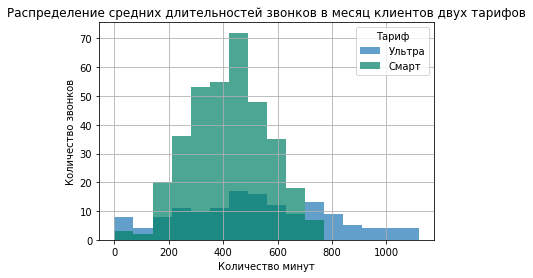

In [37]:
ax = data_mean.query('tariff == 1').plot(y='mean_duration_calls', kind='hist', bins=(
    np.arange(0, data_mean.query('tariff == 1').mean_duration_calls.max(), 70)), grid=True, alpha=0.7)
data_mean.query('tariff == 0').plot(y='mean_duration_calls', kind='hist', bins=(
    np.arange(0, data_mean.query('tariff == 0').mean_duration_calls.max(), 70)), grid=True, ax=ax, alpha=0.7, colormap='summer')
plt.legend(title='Тариф', labels=['Ультра', 'Смарт'])
plt.title('Распределение средних длительностей звонков в месяц клиентов двух тарифов')
plt.ylabel('Количество звонков')
plt.xlabel('Количество минут')
plt.show()

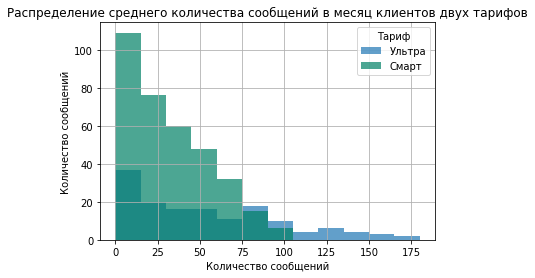

In [38]:
ax = data_mean.query('tariff == 1').plot(y='mean_number_messages', kind='hist', bins=(
    np.arange(0, data_mean.query('tariff == 1').mean_number_messages.max(), 15)), grid=True, alpha=0.7)
data_mean.query('tariff == 0').plot(y='mean_number_messages', kind='hist', bins=(
    np.arange(0, data_mean.query('tariff == 0').mean_number_messages.max(), 15)), grid=True, ax=ax, alpha=0.7, colormap='summer')
plt.legend(title='Тариф', labels=['Ультра', 'Смарт'])
plt.title('Распределение среднего количества сообщений в месяц клиентов двух тарифов')
plt.ylabel('Количество сообщений')
plt.xlabel('Количество сообщений')
plt.show()

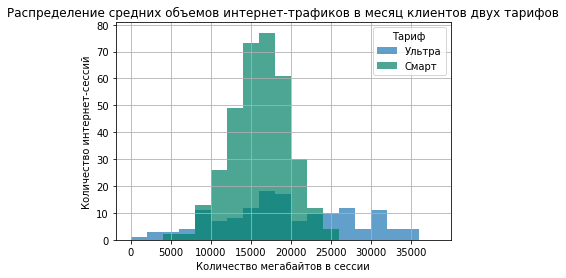

In [39]:
ax = data_mean.query('tariff == 1').plot(y='mean_traffic_volume', kind='hist', bins=(
    np.arange(0, data_mean.query('tariff == 1').mean_traffic_volume.max(), 2000)), grid=True, alpha=0.7)
data_mean.query('tariff == 0').plot(y='mean_traffic_volume', kind='hist', bins=(
    np.arange(0, data_mean.query('tariff == 0').mean_traffic_volume.max(), 2000)), grid=True, ax=ax, alpha=0.7, colormap='summer')
plt.legend(title='Тариф', labels=['Ультра', 'Смарт'])
plt.title('Распределение средних объемов интернет-трафиков в месяц клиентов двух тарифов')
plt.ylabel('Количество интернет-сессий')
plt.xlabel('Количество мегабайтов в сессии')
plt.show()

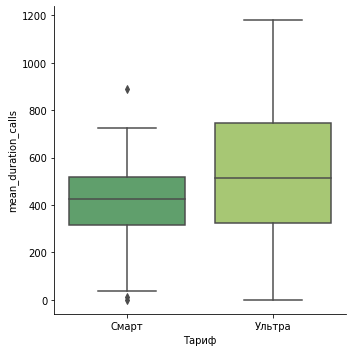

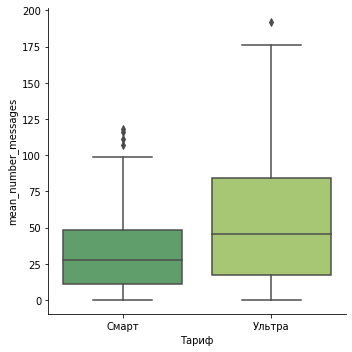

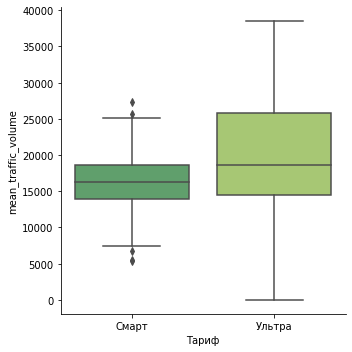

In [40]:
for column in ['mean_duration_calls', 'mean_number_messages', 'mean_traffic_volume']:
    sns.catplot(data=data_mean, kind='box', x='tariff', y=column, palette='summer').set_xlabels('Тариф').set_xticklabels(['Смарт', 'Ультра'])

## Hypothesis testing

- H0 - average revenues from users of the tariffs are equal.
- H1 - average revenues from users of the tariffs differ.

In [41]:
smart_profit = data_mean.query('tariff == 0')['mean_monthly_profit']
ultra_profit = data_mean.query('tariff == 1')['mean_monthly_profit']

`equal_var = False` since the variances of these samples are significantly different.

In [42]:
tariff_profit = st.ttest_ind(smart_profit, ultra_profit, equal_var=False)
alpha = 0.01

print(f'p-значение: {tariff_profit.pvalue:.3f}')

if (tariff_profit.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.000
Отвергаем нулевую гипотезу


- The null hypothesis is rejected. The alternative hypothesis is more likely.

In [43]:
data_mean.groupby('tariff').agg(
    median_profit_per_user=('mean_monthly_profit', 'median'), 
    number_of_users=('mean_monthly_profit', 'count')
)

,median_profit_per_user,number_of_users
tariff,,
0,"1,177",350
1,"1,950",148


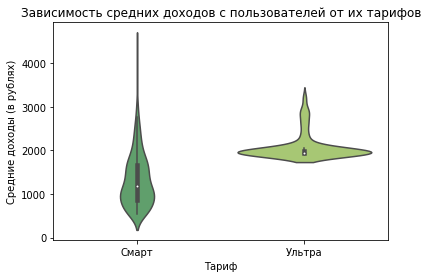

In [44]:
sns.violinplot(data=data_mean, x='tariff', y='mean_monthly_profit', palette='summer').set_xticklabels(['Смарт', 'Ультра'])
plt.title('Зависимость средних доходов с пользователей от их тарифов')
plt.ylabel('Средние доходы (в рублях)')
plt.xlabel('Тариф')
plt.show()

- H0 - average revenue from users from Moscow is equal to revenue from users from other cities.
- H1 - average revenue from users from Moscow and average revenue from users from other cities differ.

In [45]:
moscow_profit = data_mean.query('city == "Москва"')['mean_monthly_profit']
other_profit = data_mean.query('city != "Москва"')['mean_monthly_profit']

In [46]:
city_profit = st.ttest_ind(moscow_profit, other_profit, equal_var=False)
alpha = 0.01

print(f'p-значение: {city_profit.pvalue:.3f}')

if (city_profit.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.344
Не получилось отвергнуть нулевую гипотезу


- The null hypothesis cannot be rejected. 

In [47]:
def is_capital(value):
    '''Определяет столицу'''
    if value != 'Москва':
        return 'Другой населенный пункт'
    return value

In [48]:
data_mean['city'] = data_mean['city'].apply(is_capital)

In [49]:
data_mean.groupby('city').agg(median_profit_per_user=('mean_monthly_profit', 'median'))

,median_profit_per_user
city,
Другой населенный пункт,"1,619"
Москва,"1,601"


Text(0.5, 0, 'Населенный пункт')

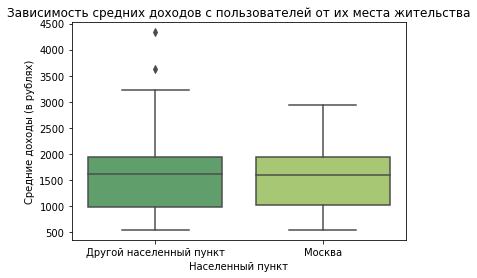

In [50]:
sns.boxplot(data=data_mean, x='city', y='mean_monthly_profit', palette='summer')
plt.title('Зависимость средних доходов с пользователей от их места жительства')
plt.ylabel('Средние доходы (в рублях)')
plt.xlabel('Населенный пункт')